In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/project/UTKFace'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
BASE_DIR = '/content/drive/MyDrive/project/UTKFace'

In [ ]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [ ]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/drive/MyDrive/project/UTKFace/92_1_0_...,92,1
1,/content/drive/MyDrive/project/UTKFace/8_1_2_2...,8,1
2,/content/drive/MyDrive/project/UTKFace/72_1_0_...,72,1
3,/content/drive/MyDrive/project/UTKFace/85_0_1_...,85,0
4,/content/drive/MyDrive/project/UTKFace/9_0_0_2...,9,0


In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

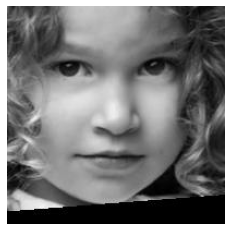

In [ ]:
from PIL import Image
img = Image.open(df['image'][8188])
plt.axis('off')
plt.imshow(img);

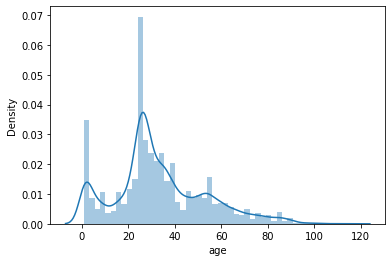

In [ ]:
sns.distplot(df['age'])

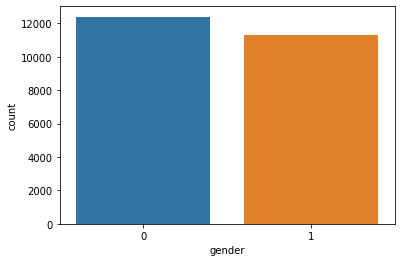

In [ ]:
sns.countplot(df['gender'])

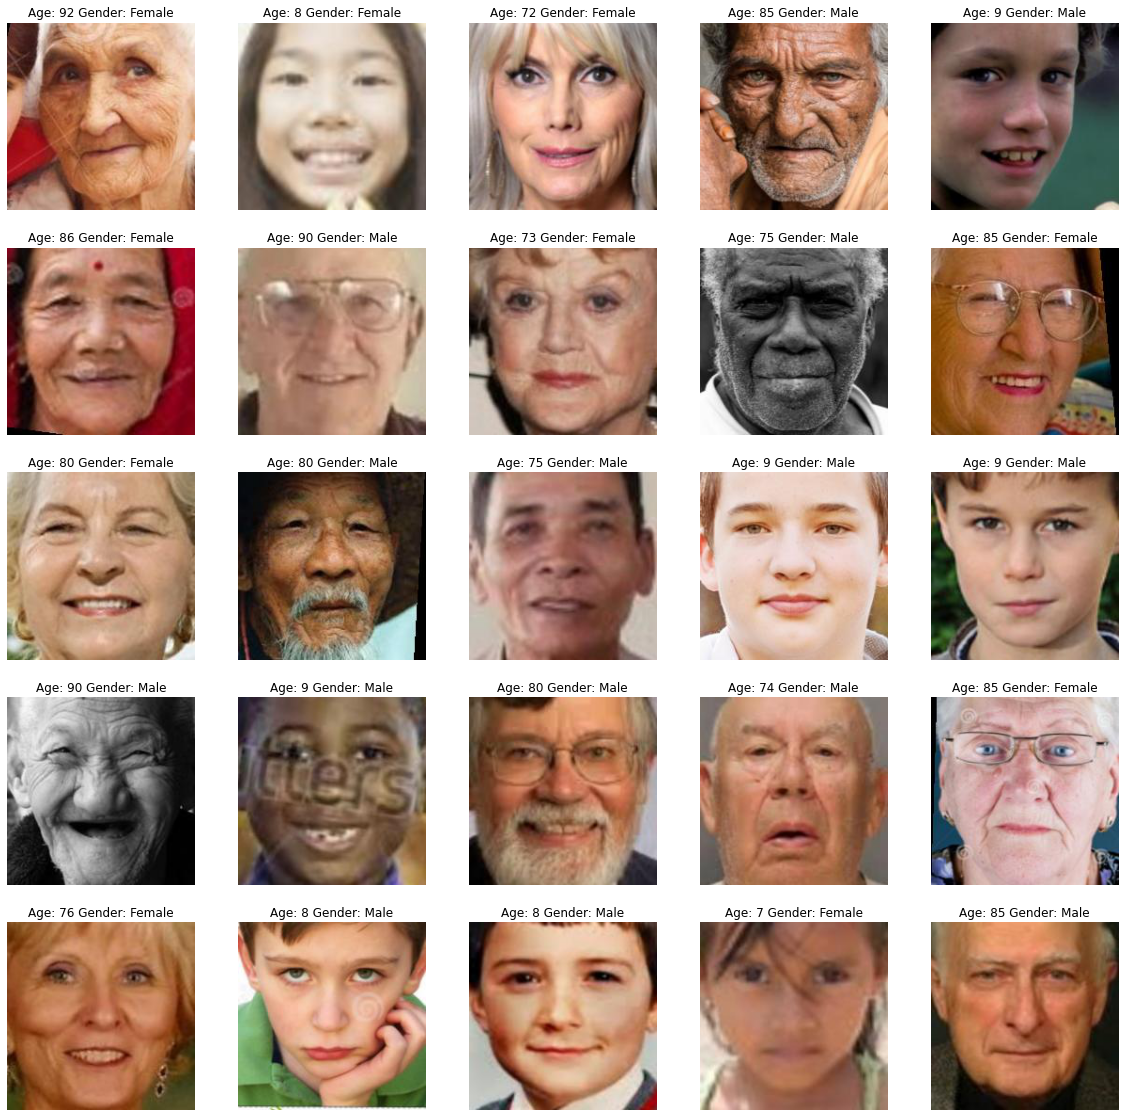

In [ ]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features


In [ ]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

(23708, 128, 128, 1)

In [ ]:
# normalize the images
X = X/255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 [==============================] - 662s 1s/step - loss: 15.3723 - gender_out_loss: 0.6719 - age_out_loss: 14.7004 - gender_out_accuracy: 0.5796 - age_out_accuracy: 0.0000e+00 - val_loss: 21.2490 - val_gender_out_loss: 0.6643 - val_age_out_loss: 20.5847 - val_gender_out_accuracy: 0.6402 - val_age_out_accuracy: 0.2368
Epoch 2/30
593/593 [==============================] - 656s 1s/step - loss: 11.9624 - gender_out_loss: 0.4899 - age_out_loss: 11.4725 - gender_out_accuracy: 0.7765 - age_out_accuracy: 0.0000e+00 - val_loss: 9.8761 - val_gender_out_loss: 0.5594 - val_age_out_loss: 9.3167 - val_gender_out_accuracy: 0.6877 - val_age_out_accuracy: 0.1617
Epoch 3/30
593/593 [==============================] - 679s 1s/step - loss: 10.2351 - gender_out_loss: 0.4115 - age_out_loss: 9.8237 - gender_out_accuracy: 0.8151 - age_out_accuracy: 0.0000e+00 - val_loss: 14.1978 - val_gender_out_loss: 0.5154 - val_age_out_loss: 13.6823 - val_gender_out_accuracy: 0.7088 - val_age_out_accuracy:

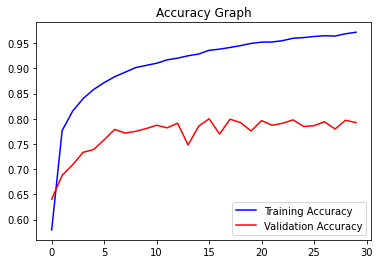

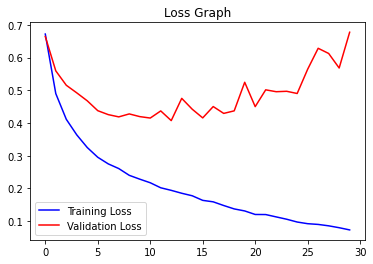

In [ ]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

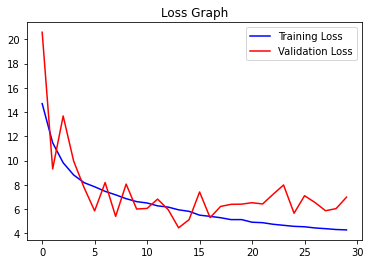

In [ ]:
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Gender: Male 
Age: 4


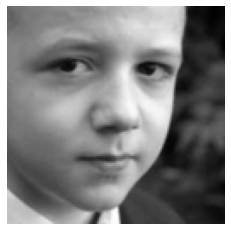

In [ ]:
image_index = 96
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');
print("Gender:",pred_gender,  "\nAge:",pred_age)

Gender: Female 
Age: 26


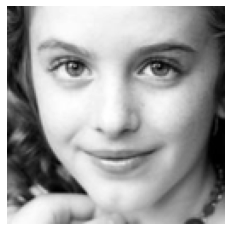

In [ ]:
image_index = 22000
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');
print("Gender:",pred_gender,  "\nAge:",pred_age)

Gender: Female 
Age: 44


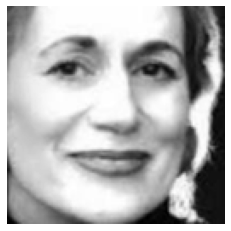

In [ ]:
image_index = 8888
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');
print("Gender:",pred_gender,  "\nAge:",pred_age)

Gender: Male 
Age: 67


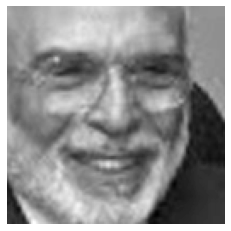

In [ ]:
image_index = 101
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])

plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');
print("Gender:",pred_gender,  "\nAge:",pred_age)